(1633, 6)


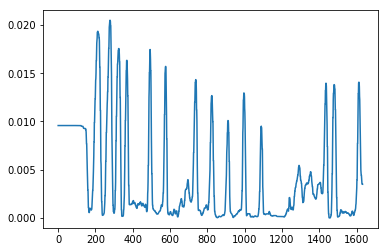

target size 881 881
(1633, 6) (1634, 384)
train_size 816
816
(816, 384) (816, 6)
2.2149450779


In [15]:
rgb_dir = '/home/rmqlife/work/data/2017-09-08-22-58-21_fabric/rgb/'
depth_dir = '/home/rmqlife/work/data/2017-09-08-22-58-21_fabric/depth/'
data_name = '/home/rmqlife/work/data/2017-09-08-22-58-21_fabric/data2.npz'

from util import *
import matplotlib.pyplot as plt

rgb_fn  = get_filelist(rgb_dir)
depth_fn = get_filelist(depth_dir)
#print rgb_fn

data = np.load(data_name)
pos = data['pos']
feat = data['feat']

print pos.shape

def pos_feat(p):
    return  p[0:3] - p[-3:]

target_pos = pos[1457]
tt_d = np.array([])
for i in pos:
    d = pos_feat(i) - pos_feat(target_pos)
    d = sum(d**2)
    tt_d = np.hstack([tt_d,d]) if tt_d.size else d
    
plt.plot(range(len(tt_d)), tt_d)
plt.show()

near_target = tt_d<0.002
target_list =  np.where(tt_d<0.002)[0]
print 'target size',sum(near_target),len(target_list)

# start regression
from regression import *

print pos.shape,feat.shape

prop = 0.5
train_size = int(len(pos)*prop)
print "train_size", train_size
model = load_model_data(pos[:train_size], feat[:train_size], num_samples=2, alpha=1)




y_tt = np.array([])
y_pred_tt = np.array([])

import time
start = time.time()
for i in range(1,len(pos)):
    x = feat[i]
    x = np.tile(x,(len(target_list),1)) - feat[target_list]
    y_pred = model.predict(x)
    y_pred_length = np.sum( y_pred*y_pred ,axis=1)
    y_pred_argmin = np.argmin(y_pred_length)


    y = pos[i]
    y = np.tile(y,(len(target_list),1)) - pos[target_list]      
    y_length = np.sum(y*y,axis=1)
    y_argmin = np.argmin(y_length)

    y_val = y[y_argmin]
    y_pred_val = y_pred[y_pred_argmin]
    
    y_tt = np.vstack([y_tt,y_val]) if y_tt.size else y_val
    y_pred_tt = np.vstack([y_pred_tt,y_pred_val]) if y_pred_tt.size else y_pred_val
    
print time.time()-start
    #print i, target_list[y_pred_argmin], target_list[y_argmin]

(1632, 6) (1632, 6) (1633, 6)


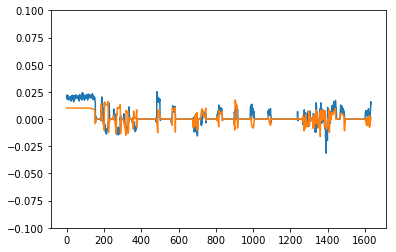

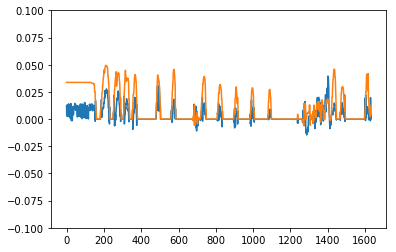

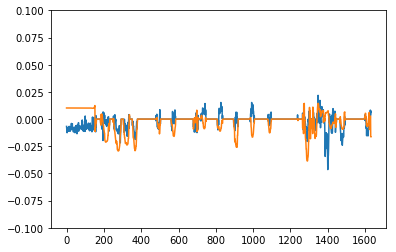

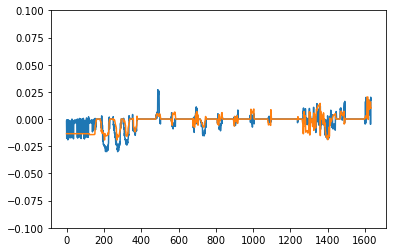

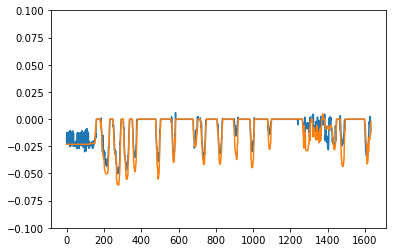

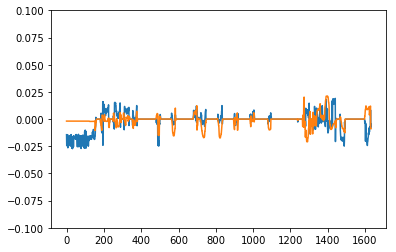

In [11]:
y_pred = y_pred_tt
y = y_tt
print y.shape, y_pred.shape,pos.shape
for i in range(y_pred.shape[1]):
    axes = plt.gca()
    axes.set_ylim([-0.1,0.1])
    plt.plot(range(y_pred.shape[0]),y_pred[:,i])
    plt.plot(range(y.shape[0]),y[:,i])
    plt.show()

